In [22]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import sys
import math
sys.path.append('/home/eduardo/PycharmProjects/treemap-analysis/code')

import Parser
import SpatialMetrics
import TemporalMetrics

This is the raw data. We have 10 rectangles with (id, x, y, width, height) information.

In [23]:
history = Parser.parse_rectangles('sqr', 'exo')
df = history[30]
N = len(df)
df.head(10)


,id,x,y,w,h
0,build.gradle,956.565264,969.403518,24.384413,30.596482
1,CONTRIBUTING.md,932.180851,969.403518,24.384413,30.596482
2,demo/build.gradle,877.127660,912.335921,11.436170,77.470581
3,demo/README.md,877.127660,989.806502,11.436170,10.193498
4,demo/src/main/AndroidManifest.xml,792.287234,985.709931,84.840426,14.290069
5,demo/src/main/java/com/google/android/exoplaye...,76.861702,912.335921,85.904255,33.111510
6,demo/src/main/java/com/google/android/exoplaye...,76.861702,945.447431,85.904255,54.552569
7,demo/src/main/java/com/google/android/exoplaye...,336.968085,912.335921,103.989362,87.664079
8,demo/src/main/java/com/google/android/exoplaye...,440.957447,912.335921,51.063830,55.246633
9,demo/src/main/java/com/google/android/exoplaye...,440.957447,967.582554,51.063830,32.417446


Here I compute the width and height of the base rectangle. The base rectangle is 1000 x 1000 pixels, so the total area is 1000000.

In [24]:
total_area = (df['x'] + df['w']).max() * (df['y'] + df['h']).max()
total_area

1000000.0000000001

Then I compute the relative weight of cells, and confirm that the sum of weights is 1.

In [25]:
df['weight'] = (df['w'] * df['h']) / total_area 
print('Sum of the weight column = ' + str(df['weight'].sum()))

Sum of the weight column = 1.0


In [26]:
df['q_ar'] = df[['w', 'h']].min(axis=1) / df[['w', 'h']].max(axis=1)
df.head(15)

,id,x,y,w,h,weight,q_ar
0,build.gradle,956.565264,969.403518,24.384413,30.596482,0.000746,0.796968
1,CONTRIBUTING.md,932.180851,969.403518,24.384413,30.596482,0.000746,0.796968
2,demo/build.gradle,877.127660,912.335921,11.436170,77.470581,0.000886,0.147620
3,demo/README.md,877.127660,989.806502,11.436170,10.193498,0.000117,0.891338
4,demo/src/main/AndroidManifest.xml,792.287234,985.709931,84.840426,14.290069,0.001212,0.168435
5,demo/src/main/java/com/google/android/exoplaye...,76.861702,912.335921,85.904255,33.111510,0.002844,0.385447
6,demo/src/main/java/com/google/android/exoplaye...,76.861702,945.447431,85.904255,54.552569,0.004686,0.635039
7,demo/src/main/java/com/google/android/exoplaye...,336.968085,912.335921,103.989362,87.664079,0.009116,0.843010
8,demo/src/main/java/com/google/android/exoplaye...,440.957447,912.335921,51.063830,55.246633,0.002821,0.924289
9,demo/src/main/java/com/google/android/exoplaye...,440.957447,967.582554,51.063830,32.417446,0.001655,0.634842


Lastly, I create a new column by multiplying columns 'q_ar' and 'weight'. 
Now we can see the weighted aspect ratio score for each cell.

We then can compute some statistics about the distribution of the two metrics.

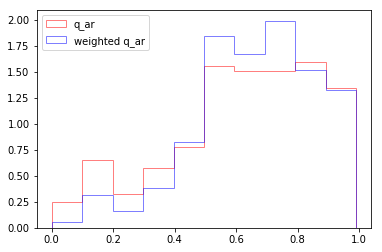

In [27]:
fig, ax = plt.subplots()
ax.hist(df['q_ar'], normed=1, histtype='step', color='r', alpha=0.5, label='q_ar');
ax.hist(df['q_ar'], normed=1, weights=df['weight'], histtype='step', color='b', alpha=0.5, label='weighted q_ar');
plt.legend(loc='upper left')

In [28]:
df['q_ar'].describe()

count    247.000000
mean       0.623829
std        0.243264
min        0.000915
25%        0.489350
50%        0.644313
75%        0.824303
max        0.990512
Name: q_ar, dtype: float64

In [29]:
df['q_w_ar'] = N * df['q_ar'] * df['weight']
df.head(15)

,id,x,y,w,h,weight,q_ar,q_w_ar
0,build.gradle,956.565264,969.403518,24.384413,30.596482,0.000746,0.796968,0.146866
1,CONTRIBUTING.md,932.180851,969.403518,24.384413,30.596482,0.000746,0.796968,0.146866
2,demo/build.gradle,877.127660,912.335921,11.436170,77.470581,0.000886,0.147620,0.032304
3,demo/README.md,877.127660,989.806502,11.436170,10.193498,0.000117,0.891338,0.025665
4,demo/src/main/AndroidManifest.xml,792.287234,985.709931,84.840426,14.290069,0.001212,0.168435,0.050439
5,demo/src/main/java/com/google/android/exoplaye...,76.861702,912.335921,85.904255,33.111510,0.002844,0.385447,0.270804
6,demo/src/main/java/com/google/android/exoplaye...,76.861702,945.447431,85.904255,54.552569,0.004686,0.635039,0.735068
7,demo/src/main/java/com/google/android/exoplaye...,336.968085,912.335921,103.989362,87.664079,0.009116,0.843010,1.898193
8,demo/src/main/java/com/google/android/exoplaye...,440.957447,912.335921,51.063830,55.246633,0.002821,0.924289,0.644056
9,demo/src/main/java/com/google/android/exoplaye...,440.957447,967.582554,51.063830,32.417446,0.001655,0.634842,0.259570


In [30]:
df['q_w_ar'].describe()

count    247.000000
mean       0.660625
std        0.770746
min        0.000169
25%        0.165365
50%        0.346382
75%        0.812945
max        4.937587
Name: q_w_ar, dtype: float64

In [31]:
print('mean q_ar =   ' + str(df['q_ar'].mean()))
print('mean q_w_ar = ' + str(df['q_w_ar'].mean()))

mean q_ar =   0.623828667589
mean q_w_ar = 0.66062477444
